# Algoritmo para estimativa de fase

Um operador é unitário se 
$$U^{-1}=U^\dagger,$$
i.e., 
$$UU^\dagger = U^\dagger U=I.$$
Vamos considerar a equação de autovalores e autovetores
$$U|u\rangle = u|u\rangle.$$
Tomando o produto interno desta equação com ela mesma, teremos que
\begin{align}
& \langle u|U^\dagger U|u\rangle = \langle u|u^* u|u\rangle \\
& \therefore\ \langle u|I|u\rangle = |u|^2\langle u|u\rangle \\
& \therefore\ 1 = |u|^2 \therefore\ 1 = |u|.
\end{align}
Ou seja, os autovalores de um operador unitário tem módulo igual a um. Escrevendo os números complexos na forma polar, teremos então que
$$u = |u|e^{i\phi} = e^{i\phi} =: e^{2\pi i\phi_u}.$$

No algoritmo de estimativa de fase quântico (QPEA), assume-se a existência de uma __caixa preta__ capaz de preparar o autovetor 
$$|u\rangle$$
e de implementar a porta 
$$U^{2^j}$$
controlada, para $j$ inteiro positivo. Claro, assume-se que isso seja feito de forma eficiente. 

O __problema__ que queremos resolver aqui é calcular a fase desconhecida $\phi_u$. O QPEA usa __2 registros__. Um deles contém o número de qubits suficiente para codificar o estado $|u\rangle$. O outro registro contém $t$ qubits, todos preparados inicialmente no estado $|0\rangle$. 

Com isso, o estado inicial será
$$|\Psi_0\rangle = |0\rangle^{\otimes t}\otimes|u\rangle.$$

Na sequência, aplicamos uma porta Hadamard em cada um dos qubits do 1º registro, obtendo assim
\begin{align}
|\Psi_1\rangle & = (H^{\otimes t}\otimes I)(|0\rangle^{\otimes t}\otimes|u\rangle) \\
& = |+\rangle^{\otimes t}\otimes|u\rangle \\
& = 2^{-t/2}\big(|0\rangle_1+|1\rangle_1\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big)\otimes|u\rangle
\end{align}

<img src='fig_phase_estimation.png' width='300'>
<img src='fig_phase_estimation_.png' width='500'>

Seguindo, aplica-se portas $U^{2^j}$ controladas, com o 2º registro (2ºr) como target e com o qubit 
$$s=1,2,\cdots,t$$
como controle, de forma que 
$$j=t-s.$$
Por exemplo, para o qubit $s=1$ como controle, teremos
\begin{align}
|\Psi_2\rangle & = C_{U^{2^{t-1}}}^{1\rightarrow (2ºr)}|\Psi_1\rangle \\
& = 2^{-t/2}\big(|0\rangle_1\otimes I|u\rangle+|1\rangle_1\otimes U^{2^{t-1}}|u\rangle\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big) \\
& = 2^{-t/2}\big(|0\rangle_1\otimes |u\rangle+|1\rangle_1\otimes e^{2\pi i\phi_u 2^{t-1}}|u\rangle\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big) \\
& = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big)\otimes |u\rangle.
\end{align}
Note que acima usamos que, para 
$$U=\sum_u u|u\rangle\langle u|,$$ 
temos 
$$U^{2^j}=\sum_u u^{2^j}|u\rangle\langle u|.$$
Então, para 
$$u=e^{2\pi i\phi_u}$$ 
sendo autovalor de $U$, o autovalor correspondente de $U^{2^j}$ será 
$$u^{2^j}=e^{2\pi i\phi_u 2^j}.$$

Do mesmo modo, continuando com a aplicação das portas $U^{2^{t-s}}$ controladas para o qubit $s=2,\cdots,t$ como controle, obteremos o estado
\begin{align}
|\Psi_3\rangle & = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{t-t}\phi_u}|1\rangle_{t}\big)\otimes |u\rangle \\
& = |\psi_3\rangle\otimes|u\rangle.
\end{align}

Vimos que a transformada de Fourier tem a seguinte ação em estados da base computacional:
\begin{align}
F|j\rangle & = \frac{1}{2^t}\sum_{k=0}^{2^{t}-1}e^{2\pi ijk2^{-t}}|k\rangle \\
& = F|j_{1}\cdots j_{t}\rangle \\
& = 2^{-t/2}\big(|0\rangle+e^{2\pi ij2^{-1}}|1\rangle\big)\otimes\big(|0\rangle+e^{2\pi ij2^{-2}}|1\rangle\big)\otimes\cdots \otimes\big(|0\rangle+e^{2\pi ij2^{-t}}|1\rangle\big).
\end{align}

Se $2^t \phi_u$ fosse um número inteiro, poderíamos identificar
$$j=2^t \phi_u.$$
Com isso, teríamos que
\begin{align}
F|2^t \phi_u\rangle & = \frac{1}{2^t}\sum_{k=0}^{2^{t}-1}e^{2\pi ik\phi_u}|k\rangle \\
& = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{0}\phi_u}|1\rangle_{t}\big).
\end{align}

Com essa suposição, de que $2^t \phi_u \in \mathbb{Z}$, obteríamos o __estado final__ 
$$|2^t \phi_u\rangle = F^\dagger F|2^t \phi_u\rangle = F^\dagger\Big(2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{0}\phi_u}|1\rangle_{t}\big)\Big).$$

Então, a penúltima fase do QPEA é aplicar a transformada de Fourier inversa, $F^\dagger$, aos $t$ qubits do 1º registro. Feito isso, obteremos o estado $|2^t \phi_u\rangle$. Por fim, fazemos uma medida na base computacional no 1º registro, obtendo e.g.
$$|b\rangle = |b_1 b_2 \cdots b_t\rangle,$$
com 
$$b_s = 0,1 \text{ para } s=0,\cdots,t.$$
Com isso, a fase é estimada usando-se
$$\phi_u = 2^{-t}b = 2^{-t}\sum_{j=1}^{t}b_j 2^{t-j}.$$

## Exemplo: Porta $T$

Essa porta é
$$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4}\end{bmatrix}.$$
Teremos assim que
$$T|1\rangle = e^{i\pi/4}|1\rangle = e^{2\pi i/8}|1\rangle = e^{2\pi i\phi_1}|1\rangle.$$
Ou seja
$$\phi_1 = \frac{1}{8}.$$
Aqui vamos usar
$$t=3$$
qubits.

In [11]:
from qiskit import *
import numpy as np
import math
from matplotlib import pyplot as plt
import qiskit
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
#from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2023-05-09 19:15:42,022: Credentials are already in use. The existing account in the session will be replaced.


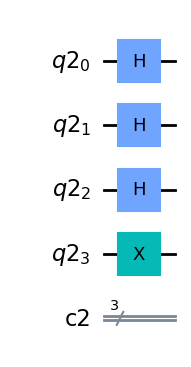

In [13]:
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.x(3)
qc.h([0,1,2])
qc.draw('mpl')

## Performance

Vimos que depois da aplicação das portas unitárias controladas o estado dos $t$ qubits do 1º registro é dado por
$$|\psi_3\rangle = \frac{1}{2^{t/2}}\sum_{k=0}^{2^t -1}e^{2\pi i k\phi_u}|k\rangle.$$
Lembremos que a transformada de Fourier discreta quântica e sua inversa são
\begin{align}
& F = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{2\pi i kl 2^{-t}}|k\rangle\langle l|, \\
& F^\dagger = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|l\rangle\langle k| \equiv \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|k\rangle\langle l|.
\end{align}

Com isso, o estado final do protocolo de estimativa de fase será
\begin{align}
|\psi_4\rangle & = F^\dagger|\psi_3\rangle \\
& = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|l\rangle\langle k|\frac{1}{2^{t/2}}\sum_{j=0}^{2^t -1}e^{2\pi i j\phi_u}|j\rangle \\
& = \frac{1}{2^t}\sum_{k,l,j=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}e^{2\pi i j\phi_u}|l\rangle\langle k|j\rangle \\
& = \sum_{l=0}^{2^t - 1}\Big(\frac{1}{2^t}\sum_{k=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}+2\pi i k\phi_u}\Big)|l\rangle \\
& = \sum_{l=0}^{2^t - 1}\Big(\frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k\Big)|l\rangle \\
& =: \sum_{l=0}^{2^t - 1}\alpha_l|l\rangle.
\end{align}

Precisaremos da série geométrica
$$S_n = \sum_{j=0}^{n-1}ar^j = \sum_{j=1}^{n}ar^j = \frac{1(1-r^n}{1-r}.$$
Primeiramente vemos que a fórmula é valida para 

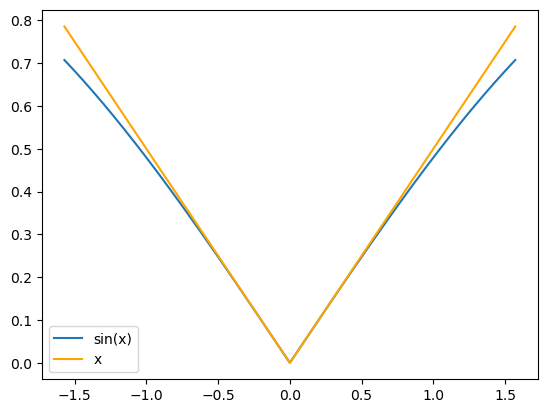

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi/2, np.pi/2, 1000)   # generate 1000 evenly spaced points between -pi and pi
y_sin = np.abs(np.sin(x/2))                      # compute sin(x) for each x
y_x = np.abs(x/2)                                # set y=x for each x

plt.plot(x, y_sin, label='sin(x)')     # plot sin(x) as a blue line
plt.plot(x, y_x, label='x', color='orange')    # plot x as an orange line
plt.legend()                           # display the legend
plt.show()                             # show the plot
